# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
# load in the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SEM 7/DS 3001/lab datasets/lab 04/cars_hw.csv')
print(df.shape) # 976 observations and 12 variables
df.head()

(976, 12)


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [25]:
# variables of interest
df=df[["Make","Make_Year","Mileage_Run","Transmission_Type","Price"]]
print(df.describe())
df.head()

         Make_Year   Mileage_Run         Price
count   976.000000    976.000000  9.760000e+02
mean   2016.963115  41571.195697  7.410195e+05
std       2.818742  24390.995134  3.673234e+05
min    2011.000000   1117.000000  1.880000e+05
25%    2015.000000  22676.750000  4.757500e+05
50%    2017.000000  37570.500000  6.665000e+05
75%    2019.000000  57421.250000  8.830000e+05
max    2022.000000  99495.000000  2.941000e+06


,Make,Make_Year,Mileage_Run,Transmission_Type,Price
0,Volkswagen,2017,44611,Automatic,657000
1,Hyundai,2016,20305,Manual,682000
2,Honda,2019,29540,Manual,793000
3,Renault,2017,35680,Manual,414000
4,Hyundai,2017,25126,Manual,515000


[[<Axes: title={'center': 'Make_Year'}>
  <Axes: title={'center': 'Mileage_Run'}>]
 [<Axes: title={'center': 'Price'}> <Axes: >]]


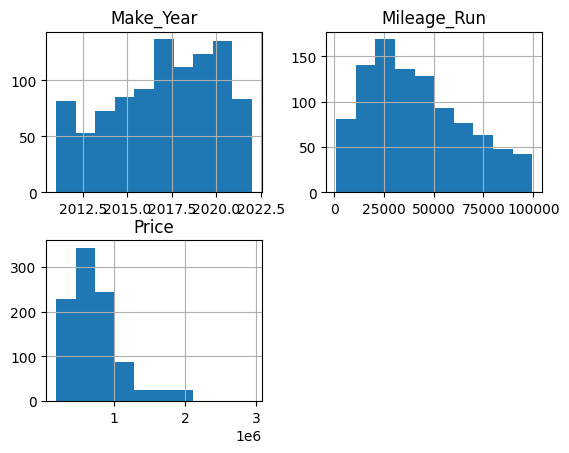

In [4]:
# EDA
print(df.hist())

<Axes: xlabel='Mileage_Run', ylabel='Density'>

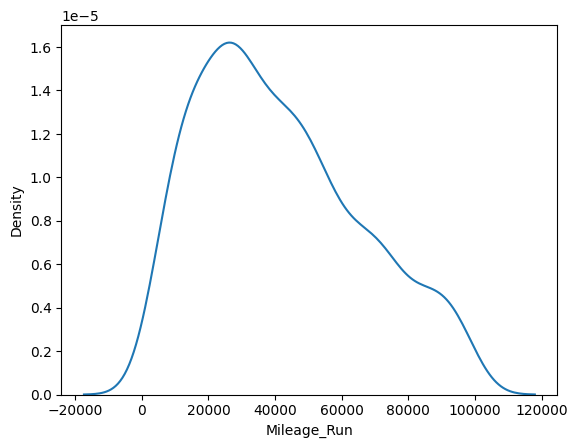

In [5]:
import seaborn as sns
sns.kdeplot(data=df, x="Mileage_Run")

<Axes: xlabel='Make_Year', ylabel='Density'>

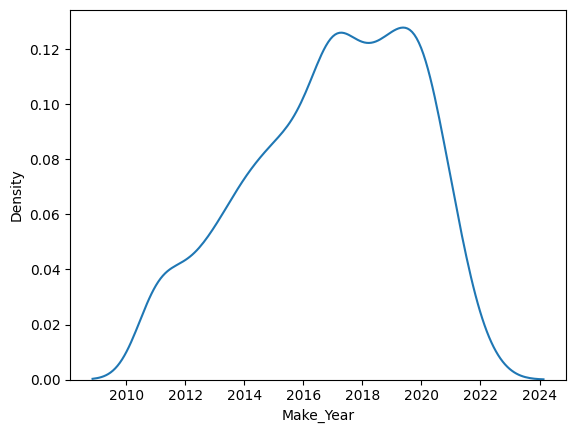

In [6]:
sns.kdeplot(data=df, x="Make_Year")

<Axes: xlabel='Price', ylabel='Density'>

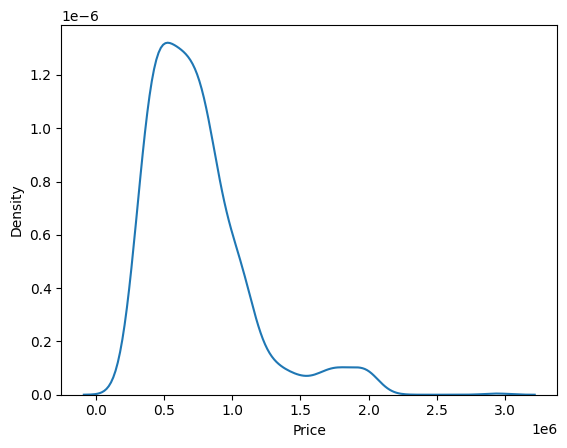

In [7]:
sns.kdeplot(data=df, x="Price")

1589000.0


<Axes: xlabel='Price', ylabel='Density'>

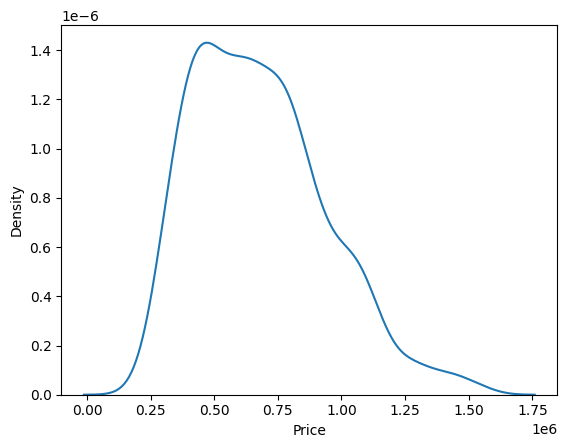

In [26]:
# remove extreme outliers (very high prices)
import numpy as np
q95 = np.quantile( df['Price'],.95)
print(q95)
# keep prices below the .90 quantile
keep = df['Price'] < q95
# locator function
df = df.loc[keep,:]
df.describe()
sns.kdeplot(data=df,x='Price')

In [33]:
print(df.shape) # 926 observations, 5 rows
print(df['Price'].describe)

(926, 5)
<bound method NDFrame.describe of 0       657000
1       682000
2       793000
3       414000
4       515000
        ...   
971     956000
972    1027000
973     736000
974     749000
975     691000
Name: Price, Length: 926, dtype: int64>


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


In [36]:
from sklearn import linear_model
x = pd.get_dummies(df['Make'],dtype='int') # create 15 dummy variables
print(x)

     Chevrolet  Datsun  Ford  Honda  Hyundai  Jeep  Kia  Mahindra  \
0            0       0     0      0        0     0    0         0   
1            0       0     0      0        1     0    0         0   
2            0       0     0      1        0     0    0         0   
3            0       0     0      0        0     0    0         0   
4            0       0     0      0        1     0    0         0   
..         ...     ...   ...    ...      ...   ...  ...       ...   
971          0       0     0      0        1     0    0         0   
972          0       0     0      0        1     0    0         0   
973          0       0     0      0        1     0    0         0   
974          0       0     1      0        0     0    0         0   
975          0       0     0      0        0     0    0         0   

     Maruti Suzuki  Nissan  Renault  Skoda  Tata  Toyota  Volkswagen  
0                0       0        0      0     0       0           1  
1                0       0   

3. Implement an ~80/~20 train-test split. Put the test data aside.

In [37]:
# 3. 80% for training and 20% for evaluation:
from sklearn.model_selection import train_test_split

y = df['Price'] # predict y (outcome variable)
X = df.drop('Price',axis=1) # variables (x) to predict "Price" (y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.